In [118]:
import pandas as pd
import numpy as np

In [119]:
df=pd.read_csv("C:\\Users\\abhin\\Downloads\\archive (13)\\spam_sms.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
df.shape

(5572, 2)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [122]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [124]:
encoder.fit_transform(df['target'])
df.loc[:,'target'] = encoder.fit_transform(df['target'])

In [125]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [126]:
df.duplicated().sum()

403

In [127]:
df = df.drop_duplicates(keep='first')

In [128]:
df.duplicated().sum()

0

In [129]:
df.shape

(5169, 2)

## EDA

In [130]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

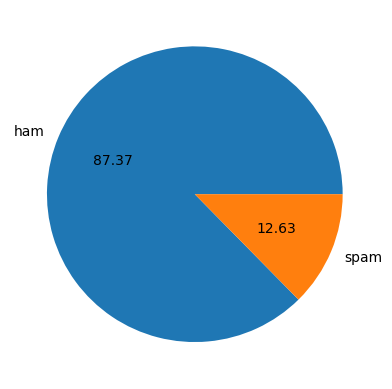

In [131]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [132]:
import nltk

In [133]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
df.loc[:, 'num_characters'] = df['text'].apply(len)


In [135]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [136]:
df.loc[:, 'text'] = df['text'].astype(str)
df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [137]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [138]:
df.loc[:,'num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [139]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [140]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [141]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [142]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [143]:
import seaborn as sns

C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

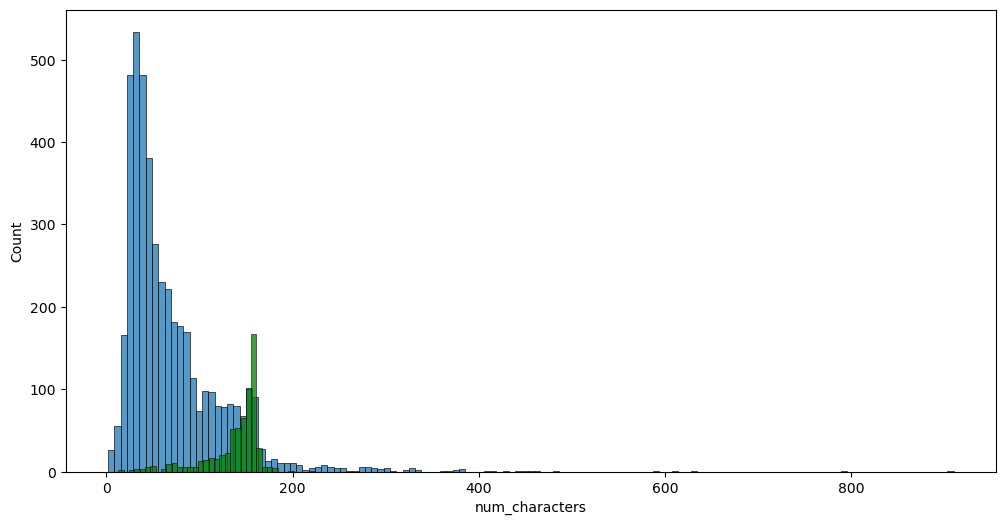

In [144]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='green')

C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

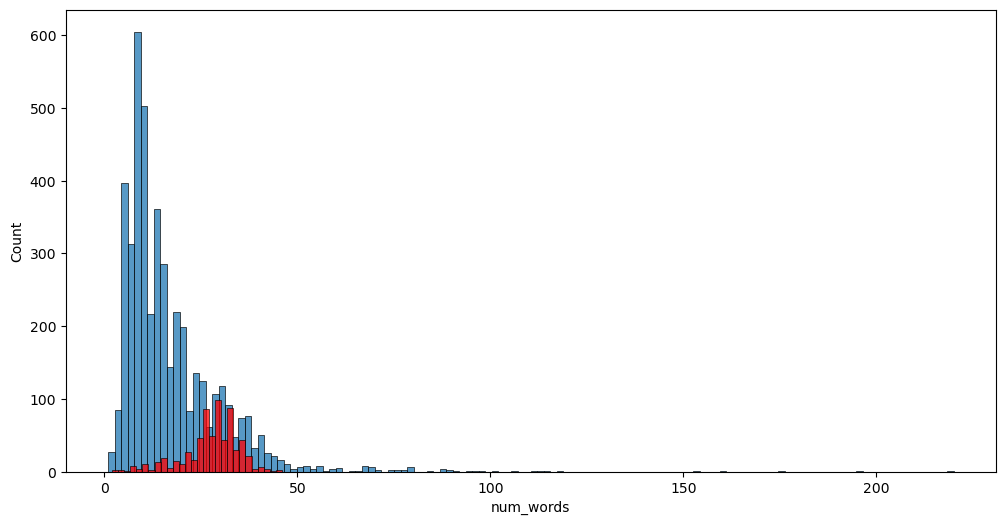

In [145]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

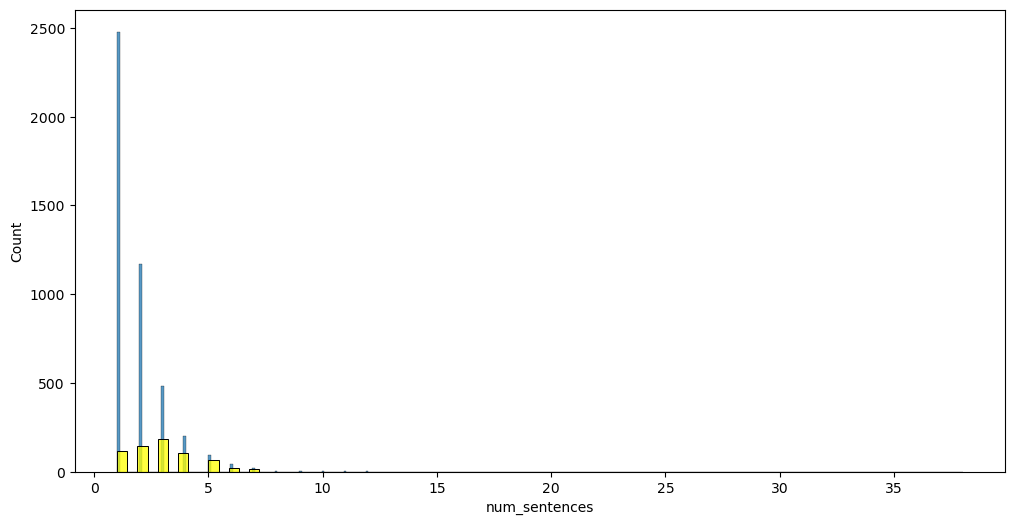

In [146]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='yellow')

C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


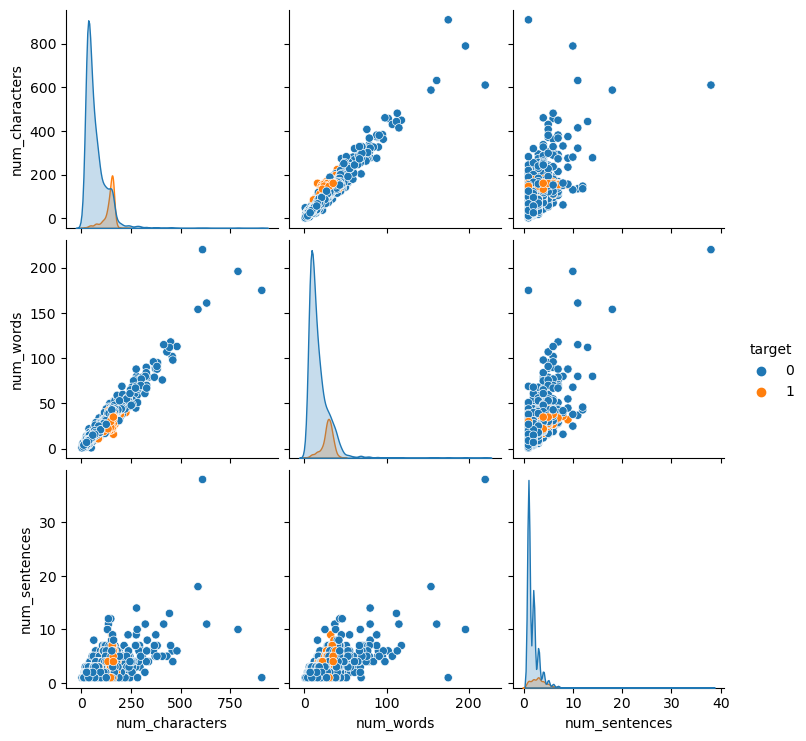

In [147]:
sns.pairplot(df,hue='target')

<Axes: >

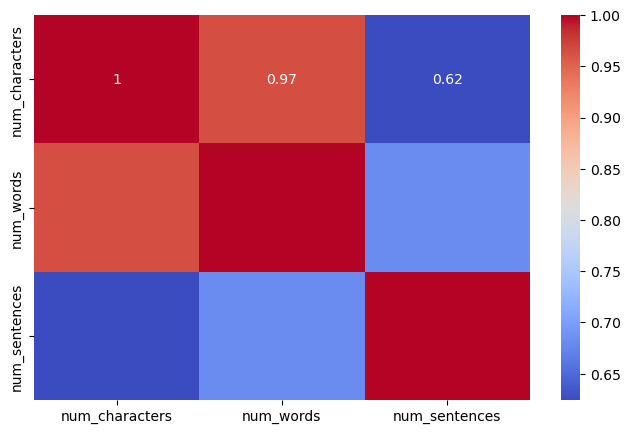

In [148]:
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

## Data Preprocessing

In [149]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [151]:
df['transformed_text'] = df['text'].apply(transform_text)

In [152]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [153]:
!pip install wordcloud

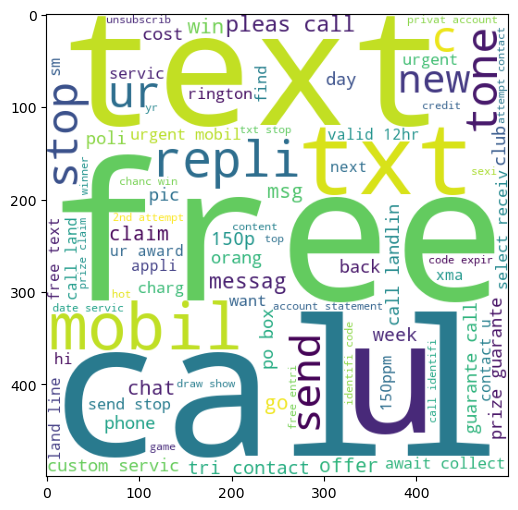

In [154]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

## Model Building

In [155]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [156]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [157]:
y = df['target'].values

In [158]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [160]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [161]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Gaussian Naive Bayes

In [162]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are your labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Then, use the encoded labels in your fit and predict calls
gnb.fit(X_train, y_train_encoded)
y_pred1 = gnb.predict(X_test)

# Evaluate the performance
print("Accuracy Score:   ", accuracy_score(y_test_encoded, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred1))
print("Precision Score:   ", precision_score(y_test_encoded, y_pred1))


Accuracy Score:    0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision Score:    0.5068493150684932


### Multinomial Naive Bayes

In [163]:
mnb.fit(X_train,y_train_encoded)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score:   ",accuracy_score(y_test_encoded,y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test_encoded,y_pred2))
print("Precision Score:   ",precision_score(y_test_encoded,y_pred2))

Accuracy Score:    0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score:    1.0


### Bernouli Naive Bayes

In [164]:
bnb.fit(X_train,y_train_encoded)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score:   ",accuracy_score(y_test_encoded,y_pred3))
print("Confusion Matrix:\n",confusion_matrix(y_test_encoded,y_pred3))
print("Precision Score:   ",precision_score(y_test_encoded,y_pred3))

Accuracy Score:    0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score:    0.991869918699187


In [165]:
!pip install xgboost

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [167]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)


In [168]:
clfs = {
    'K Nearest Neighbour Classifier' : knc, 
    'Naive Bayes': mnb, 
    'Decision Tree Classifier': dtc, 
    'Logistic Regression': lrc,  
    'AdaBoost Classifier': abc, 
    'Bagging Classifier': bc
    }

In [169]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_train_binned = kbin.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_binned = kbin.transform(y_test.reshape(-1, 1)).ravel()

C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [170]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # or 'macro', 'micro'
    return accuracy, precision

# Example usage with SVC classifier


In [171]:
#train_classifier(svc,X_train,y_train_binned,X_test,y_test_binned)

In [172]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train_binned,X_test,y_test_binned)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  K Nearest Neighbour Classifier
Accuracy -  0.9052224371373307
Precision -  0.9145667038984391
For  Naive Bayes
Accuracy -  0.9709864603481625
Precision -  0.971926423835803
For  Decision Tree Classifier
Accuracy -  0.9332688588007737
Precision -  0.9296329167705031
For  Logistic Regression
Accuracy -  0.9584139264990329
Precision -  0.958885174964784


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost Classifier
Accuracy -  0.960348162475822
Precision -  0.9595027601236827
For  Bagging Classifier
Accuracy -  0.9584139264990329
Precision -  0.957516941029288


In [173]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [174]:
performance_df

,Algorithm,Accuracy,Precision
1,Naive Bayes,0.970986,0.971926
4,AdaBoost Classifier,0.960348,0.959503
3,Logistic Regression,0.958414,0.958885
5,Bagging Classifier,0.958414,0.957517
2,Decision Tree Classifier,0.933269,0.929633
0,K Nearest Neighbour Classifier,0.905222,0.914567


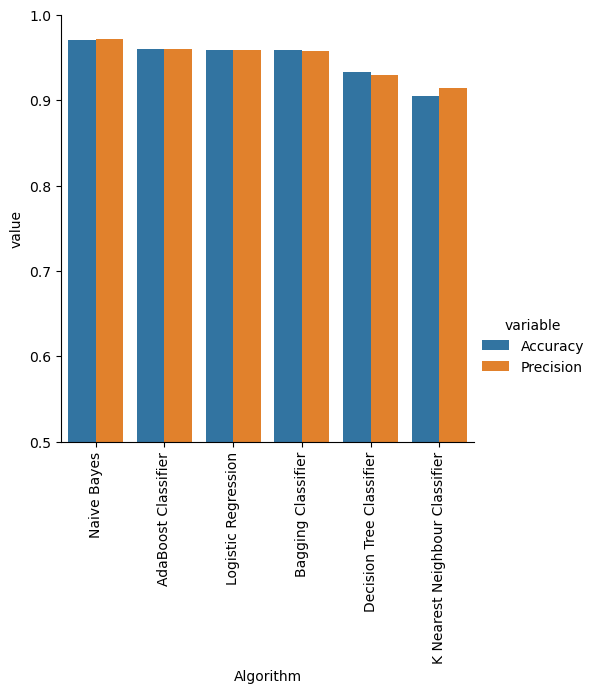

In [175]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [176]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))